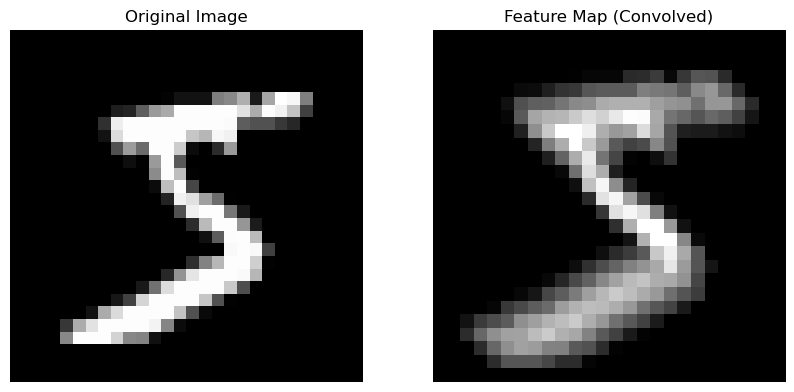

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load a sample image from MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), _ = mnist.load_data()

# Select the first image and normalize it
image = x_train[0].astype(np.float32) / 255.0  # Normalize to [0,1]
image = np.expand_dims(image, axis=(0, -1))  # Reshape to (1, 28, 28, 1) for TensorFlow

# Step 2: Define a 3x3 diagonal filter manually
filter_weights = np.array([
    [1, 0, 0], 
    [0, 1, 0], 
    [0, 0, 1]
], dtype=np.float32)

# Reshape filter to match TensorFlow format (Height, Width, Channels, Num_Filters)
filter_weights = np.expand_dims(filter_weights, axis=-1)  # (3, 3, 1)
filter_weights = np.expand_dims(filter_weights, axis=-1)  # (3, 3, 1, 1)

# Step 3: Apply convolution with stride=1, no padding (valid)
image_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
filter_tensor = tf.convert_to_tensor(filter_weights, dtype=tf.float32)

feature_map = tf.nn.conv2d(image_tensor, filter_tensor, strides=1, padding="VALID")
feature_map = feature_map.numpy().squeeze()  # Convert back to NumPy and remove extra dimensions

# Step 4: Visualize the Feature Map
plt.figure(figsize=(10,5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Feature Map
plt.subplot(1, 2, 2)
plt.imshow(feature_map, cmap="gray")
plt.title("Feature Map (Convolved)")
plt.axis("off")

plt.show()
